C:\Users\klgt1\AppData\Local\Temp\ipykernel_16828\4288836731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 906, number of negative: 1115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 2021, number of used featur

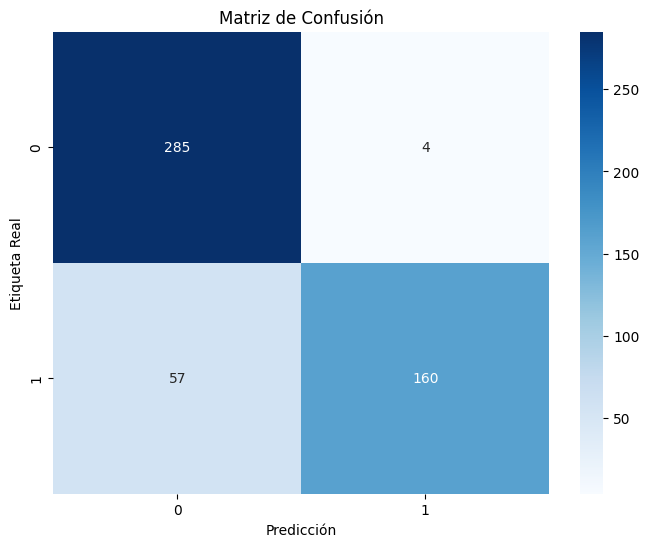

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from lightgbm import LGBMClassifier
import os
# Obtener la ruta del directorio actual
ruta_actual = os.getcwd()
# Concatenar el nombre del archivo al final de la ruta actual
archivo = os.path.join(ruta_actual, 'Balanced_Data_Set.xlsx')
# Cargar datos
df = pd.read_excel(archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('CONDUCTA', axis=1)
y = df['CONDUCTA']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [20, 50, 100],
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 20, 50],
    'subsample': [0.8, 0.9, 1.0],
    'feature_fraction': [0.6, 0.7, 0.8],
    'min_child_samples': [10, 20, 30]
}

# Inicializar el modelo LGBMClassifier
lgbm_model = LGBMClassifier()

# Realizar la búsqueda exhaustiva de hiperparámetros
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='precision', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

best_score = grid_search.best_score_
print("Mejor score encontrado:", best_score)

# Utilizar el mejor modelo encontrado
best_lgbm_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_lgbm_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'\nPrecisión del modelo: {precision * 100:.2f}%')
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Recall del modelo: {recall * 100:.2f}%')
print(f'F1-score del modelo: {f1 * 100:.2f}%')

# Construir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=best_lgbm_model.classes_, yticklabels=best_lgbm_model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()